# Asset Pre-Assessment: SP500 Case Study for Large Cap US Stock

In this project, we assess hsitroical data for selecting statistical parameters
and general market trends.
It is our contention that, in the long-term and typically the mid-term as well, 
the US stock market increases in value at a rate significantly higher than inflation 
and typically higher than most other investment opportunities.
Furthermore, investing on longer times-scales and over several assets it is more 
likley to benifit from classical statistical approches used to learn
from past data in order to make informed choices (more data can equal better statistics).
This is why Condor suggests a diversified, mid- to long-hold investment strategy
for the typical investor.
We, somewhat arbitrarily, consider 5 and 10+ years to be  
be mid and long time-scales for investment.
Although some stratagies and insights may be relavant at scales < 5 years.

for typical retail investors, however, it is not possible to hold 
a large enough portfolio to sufficiently cover the market, 
a subsection like Large Cap US Stocks
or even an individual sector.
While passive ETFs (e.g. the SPDR S&P 500 ETF trust, SPY) 
do provide a decent mechanism to over come issues of wide market coverage 
at low buy-in amounts,
investors often have interest in holding specific stocks for a variety of reasons.
To facilitate this, systematic methods have been developed to 
assist in determining the proper distribution, or allocation,
of investment funds across multiple risky assets. 
For example, Modern Portfolio Theory, which uses mean-variance portfolio optimisation.
Condor Funds expects to apply variations on such methods to empower
clients without a strong technical background with tools to rationally balance their portfolio investments.

These methods require the estimate of asset metrics 
For example, expected asset return and volatility (risk).
Importantly, this in-turn requires the choice of statistical meta parameters 
(e.g. historical data smapiling frequency and period).
This work allows us to propose reasonable parameters for 
the overall US Large Cap Stock Market.
These parameters will be used as a 'rule-of-thumb' for 
optimising portfolios with individual US stock assets.
We do note that given sufficient historical data, 
such meta parameters could be calculated at the individual asset level and
that the following analysis can be used for any risky asset with 
sufficient historical data.

In addition, when holding a long-term portfolio there are clearly periods in-which 
the market deviates from a consistent, pre-anticipated trend.
This can lead to sharp, unexpected increases or losses in returns.
Some of these events can extend over multiple months or even years 
and cause anxiety in investors. 
Ultimately, this can result in counter-productive portfolio management decisions,
such as selling stocks as overall market prices trend downwards
despite historical observations that markets recover over sufficient time periods.
To overcome concerns, we hope to quantify conditions around market deviations.
We believe that investors can act more confidently during unusual deviation events 
if we can inform and prepare them for such inevitabilities prior to investment.
Furthermore, specific properties of these events can inform 
proper portfolio management strategies.
For example, how often to fully reassess investment allocations vs 
simply rebalancing a portfolio to match predetermined allocations.

As always, we stress that this is a statistical analysis based only on past data.
Statistical trends and expectations are more likley to be realized 
in future results given more data and oppertunity.
In this context more oppertunity typically means 'over the long-term'. 
However, past performace never gurantees future results.
There are always several complex factors at play.
For example, while very unlikley, it is always *possible* that 
the market could change in such a fundemental way that all 
past data could be rendered uninformative.
All investors should stay up-to-date on their investment positions
and be open to other sources of information.
This analysis, like all others,
has a limited source of input data and a narrow view point on goals.
Consideration of additional market factors could improve real-world outcomes.
This consideration becomes increasingly important at shorter
time-scales of investment.

This workflow uses historical data to assess simple trend fitting, 
autocorrelation and robust statistics for estimating risk and return metrics.
For robust statistics, we use the median to estimate a parameters expected value
and the Median Absolute Deviation (MAD) with normal corrrection 
as a measure of dispersion of the parameter around the expected value.
Dispersion is a more general term than variance but describes the same concept.
We note that our choice for dispersion metric would approch 
the standard deviation for normally distributed data as the sample
size approches inf.
It is well documented that the assumption of a normal 
distribution is a major cause for concern in the original 
formulation of MPT's mean-variance optimization.
As this poorly describes stock returns.
There are sevral far more complex solutions for the 
applicaiton of robust statistics on portfolio opptimization in the liturature.
However, we previously found (Project 202410) that this simple 
median and MAD strategy have marit and can out perform a normal distribution assumption.

The goal here is to identify:
* sample freq;
* sample period;
* deviation event lengths (particularly for re allocation timeframes); and
* expected returns as a function of hold time.

### *Notice*
*We stress that none of our Jupyter Notebook projects are to be considered final and of publication quality unless otherwise stated. We also provide no warranty or guarantee of any kind. These projects are meant for testing code and learning concepts in a transparent, and often evolving manner. If new methodologies, stratagies or fundamental understandings are applied in the future, they will most likely be explored in future projects. For transparency and documentation, old projects will not be removed but instead will be deprecated (and clearly marked as such). Look for updates on GitHub https://github.com/Rtasseff/condor_test/tree/main/project*

## Setup

In [7]:
# Paths

# Analytics dir path *USER SET*
analyticsDir = '/Users/rtasseff/projects/condor_test/analytics'
# Data dir path *USER SET*
dataDir = '/Users/rtasseff/projects/tmp'
import sys
# adding analytics to the system path
sys.path.insert(0, '/Users/rtasseff/projects/condor_test/analytics')

from data_mining import load
from functions import genStats
from functions import genFin
from functions import assetPreassess as apa
from functions import utils


import numpy as np
import matplotlib.pyplot as plt


## I. SP500 Data 
We are using 50 years of S&P 500 history (1974-2024), 
obtained from Yahoo Finance under the symbol ^GSPC.

### i. Load Price

Show pricing data by date and plot.
Here we are using the adjusted closing price as our main daily indicator.

<class 'pandas.core.frame.DataFrame'>
Index: 12608 entries, 12607 to 0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         12608 non-null  datetime64[ns]
 1   Open         12608 non-null  float64       
 2   High         12608 non-null  float64       
 3   Low          12608 non-null  float64       
 4   Close*       12608 non-null  float64       
 5   Adj Close**  12608 non-null  float64       
 6   Volume       12608 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 788.0 KB


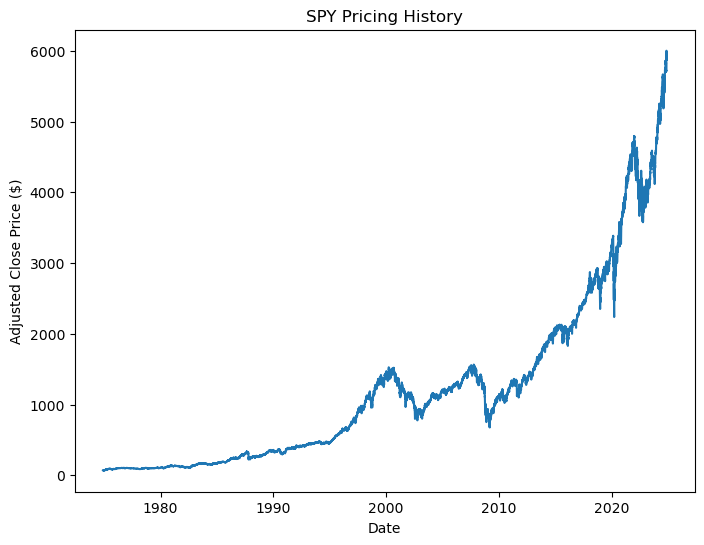


----------
Time Span: 600 months
Number of points sampled: 12608


In [8]:


# get data

#dates,prices = load.assetHist_CSV(dataDir+'/spy_MAX.tab', sep='\t',assetN='SPY')
dates,prices = load.assetHist_CSV(dataDir+'/sp500_GSPC_50y.tab', sep='\t',assetN='SPY')

#dates = dates[2500:]
#prices = prices[2500:]

print('')
print('----------')
print('Time Span: '+str(np.datetime64(dates[-1], 'M')-np.datetime64(dates[0], 'M')))
print('Number of points sampled: '+str(len(dates)))



### ii. Caculate Returns
In the future, we will be considering many estimates over monthly relative returns.
We feel this may actually be a more important feature, vs price, 
to look at for exploring certain detials.  For example, 
in Projects 202407 and 20409, we found long term memory and high noise 
(as determined from the autocorrelation function) in the price. 
Therefore we chose to consider the returns for determining the samplining frequence.

Here we defined a month to be 21 consecutive adjusted closing day prices. 
We are considering set 30 day period for a month. 
Stock is traded and recorded only when the market is open, 
so our time series only contains weekdays.
We are removing 2 weekends days per week. 
A 30 day month, given 4.25 weeks each month, yields 8.5 weekend days.
We removed 9 days to account for a handful of holidays.
Importantly, this is consistant with the number of data points over a
spepcific range of time as confirmed in past studies.

As a matter of practice, we are considering relative returns.
 


[-0.01977768 -0.00806452 -0.01458027 ...  0.02925407  0.01826282
  0.00499018]
['1974-12-18T00:00:00.000000000' '1974-12-19T00:00:00.000000000'
 '1974-12-20T00:00:00.000000000' ... '2024-11-13T00:00:00.000000000'
 '2024-11-14T00:00:00.000000000' '2024-11-15T00:00:00.000000000']


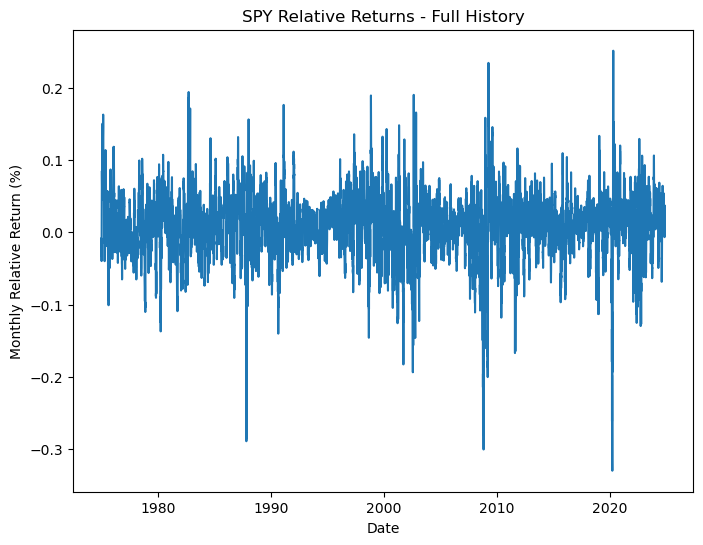

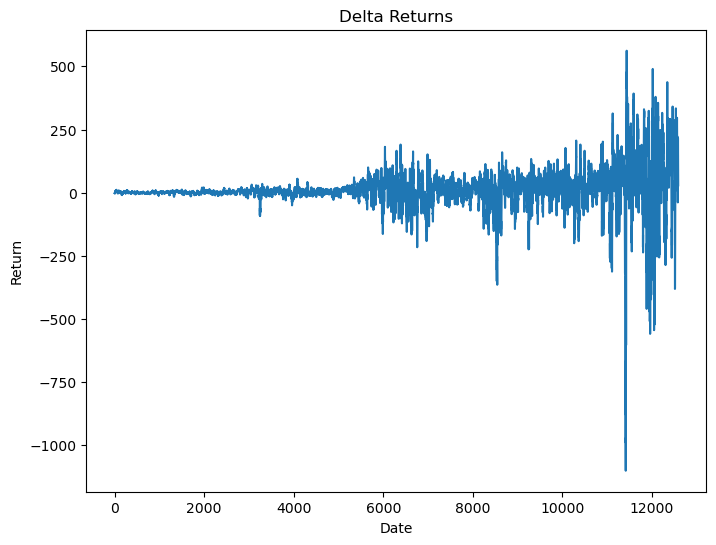

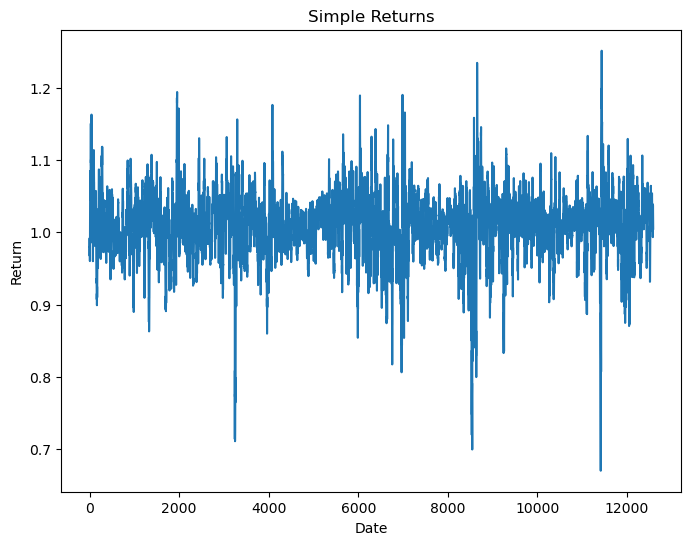

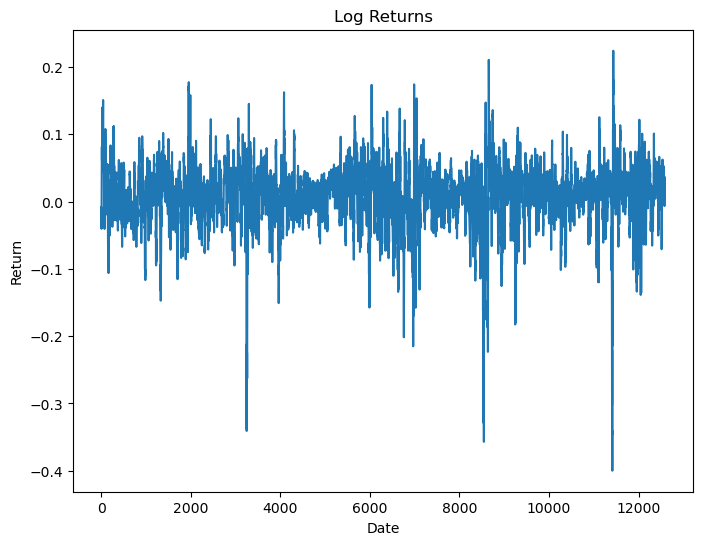

In [9]:
# conversion factor for months to consecutive points *USER SET*
month2days = 21

returns = genFin.returns(prices,period=month2days)
inds = np.arange(0,len(returns))+month2days
dates_returns = dates[inds]

# Show for sanity check
print(returns)
print(dates_returns)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_returns, returns)
plt.xlabel('Date')
plt.ylabel('Monthly Relative Return (%)')
plt.title('SPY Relative Returns - Full History')
plt.show()

#Plot the non relative data for fun
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0,len(returns)), genFin.returns(prices,period=month2days,metric='Delta'))
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Delta Returns')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(np.arange(0,len(returns)), genFin.returns(prices,period=month2days,metric='Simple'))
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Simple Returns')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(np.arange(0,len(returns)), genFin.returns(prices,period=month2days,metric='Log'))
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Log Returns')
plt.show()
         

## II. Sampling Frequency 

For any statistical analysis, we have to determine how much time will pass 
between t<sub>i</sub> and <sub>i+1</sub> in our data set. 
In our experience, this is often arbitrarily determined, 
but here we considered a more formal statistical approach. 
We want to maximize the number of sampling points while minimizing their dependence since a proper statistical analysis would require statistically independent samples.
We would like to select a sampling rate that minimizes the statistical dependance between data points that is driven simply by proximity in time, 
but keep as many data points as possible to boost statistical power. 
In a perfect senario this would be done by considering the elapsed time for the Auto-Correlation Function (ACF) to drop and then remain at zero. 
Of course, in any real-world data there is noise that keeps this from happening. 
In complex non-linear systems like the stock market 
there is also the high possibility of long-term memory effects as observed 
when the ACF does not approach zero or deviates from it after a period of time. 
We arbitrary chose a cutoff of +/-0.05 around the zero to be considered 'reasonably' near zero.

Previously (Project 202409), we formulated a set of rules 
to systematically select a sampling frequency from the ACF. 
First, we chose to require that the zero was within the 95% CI of the ACF value. 
This is a necessary but not a sufficient condition for being near zero. 
We also chose to require the ACF value to be within the cutoff range 
defined above as +/- 0.05. 
We went further to require the above to be true for one month, 
defined above as 21 days (i.e. 21 consecutive data points in the time course). 
Since the returns are 21 days, it stands to reason we would like our samples to be spaced such that they are nearly uncorrelated over 21 days.

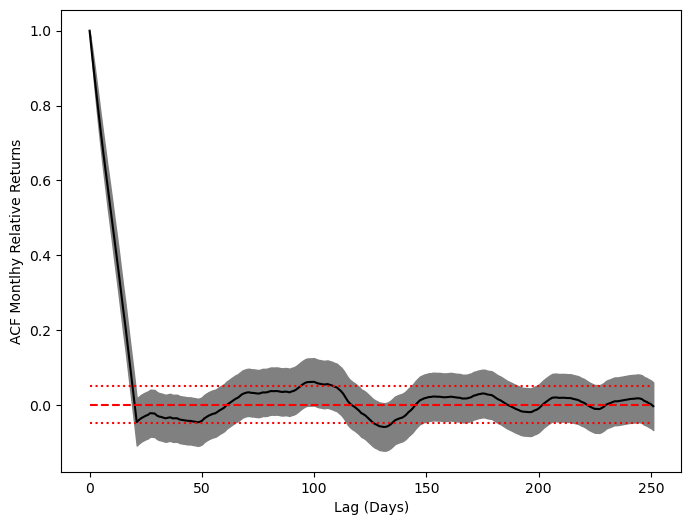

Return ACF
[ 1.          0.94166359  0.88676095  0.83358025  0.78069953  0.72893219
  0.67904847  0.63177374  0.58326068  0.53865823  0.49239324  0.44441437
  0.39872538  0.35202265  0.30238097  0.25340275  0.20776186  0.15694526
  0.1056676   0.05661669  0.00651326 -0.0462659  -0.0405982  -0.03581985
 -0.03244152 -0.02932045 -0.02689641 -0.02232655 -0.02273147 -0.02341434
 -0.0287183  -0.03151023 -0.03262566 -0.03476668 -0.03619471 -0.03440371
 -0.03352399 -0.03628145 -0.03600281 -0.03606108 -0.03911434 -0.04043612
 -0.04127584 -0.04228459 -0.04306818 -0.04303171 -0.04446052 -0.04517865
 -0.0468242  -0.04580741 -0.04303009 -0.03686989 -0.03279238 -0.02913798
 -0.02642495 -0.02400308 -0.02265104 -0.01874613 -0.01439631 -0.01126593]
Return ACF 95% Conf
[[ 1.          0.92419383  0.85766732  0.7971603   0.73886004  0.68286086
   0.62958242  0.57954019  0.52874489  0.48227011  0.43445599  0.38521375
   0.33851519  0.29101194  0.24075349  0.19132412  0.14536834  0.09434096
   0.04294333 -0

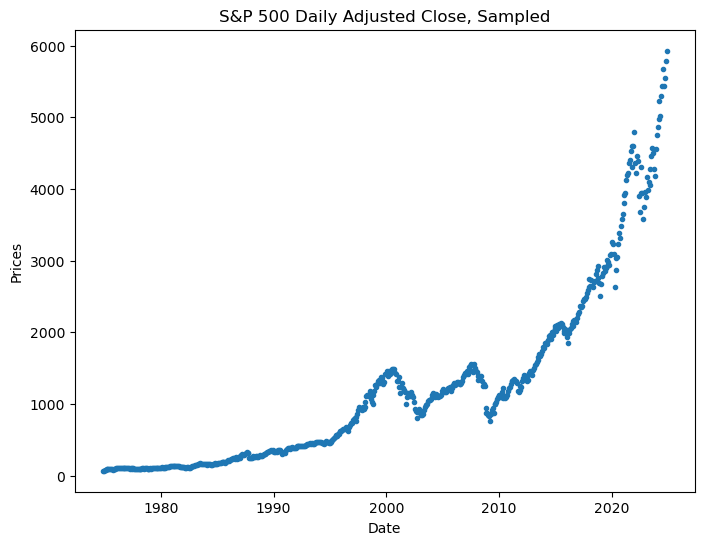

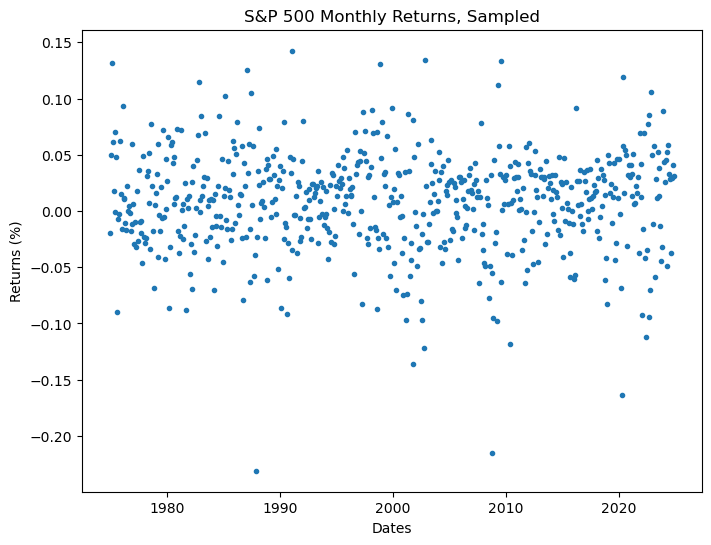

In [10]:
# +/- cutoff for 'near zero' ACF values *USER SET*
acfCutoff = 0.05

# Calc autocorr
acf_return, lag_return, acfConf_return = genStats.acf(returns,fracLag=0.02)



# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(lag_return, acf_return,color='black')
plt.plot(lag_return, lag_return*0 ,'r--') 
plt.plot(lag_return, lag_return*0 + acfCutoff,'r:') 
plt.plot(lag_return, lag_return*0 - acfCutoff,'r:') 
plt.fill_between(lag_return,acfConf_return[:,0],acfConf_return[:,1],color='gray')
plt.xlabel('Lag (Days)')
plt.ylabel('ACF Montlhy Relative Returns')
#plt.title('')
plt.show()


print('Return ACF')
print(acf_return[:60])
print('Return ACF 95% Conf')
print(acfConf_return[:60].T)


sampFreq = apa.find_samp_freq(returns, cutoff=acfCutoff, period=month2days, fracLag=0.02)


print('Samp Freq')
print('- '+str(sampFreq))

# Parse out the proper sample data
n = len(prices)
inds = np.arange(0,n,sampFreq)
prices_samp = prices[inds]
dates_samp = dates[inds]


n = len(returns)
inds = np.arange(0,n,sampFreq)
returns_samp = returns[inds]
dates_returns_samp = dates_returns[inds]

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_samp,prices_samp,'.')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('S&P 500 Daily Adjusted Close, Sampled')
plt.show()

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_returns_samp,returns_samp,'.')
plt.xlabel('Dates')
plt.ylabel('Returns (%)')
plt.title('S&P 500 Monthly Returns, Sampled')
plt.show()



## III. Asset Deviations
Here we identified deviations in the price that were 'meaningfully' different 
from what one might expect given the 'simple' underlying trend of the data.
To do this we need to identify an underlying trend, define what is 
'meaningfully' different and identify sequental occurances of this trend.

### i. Priceing Trend 
We will be considering several 'simple' models for an underlying price trend.

Models:
* Polynomials 1-8th order
* exp function
* logrithmic function

All models were fit by transforming variables and then 
using the statsmodel library ordinary least squares solver.
In projects 202407, 202409 and 202410, we chose to use the maximum 
adjusted R-Squared value for the model selection criterion.
We applied the same here. 

Note that we used the modified, smaller samplied data set
for determining quantaties of a statistical nature.

#### Side Note:

As discussed in Project 202410,
we found a signifcant impact of x scaling on fitting early time points.
Therefore we applied multiple scaling parameters as before and 
manually chose one.
More work needs to be done to systimatically automate this in the future.
However, it should be noted that it would not make much or any 
change to selection of sample freq and period, which are the most important findings here.
It has the largest impact on deviation, 
and since we report robust statistics to describe the typical deviation event,
a subset of distorted early values would have little impact.




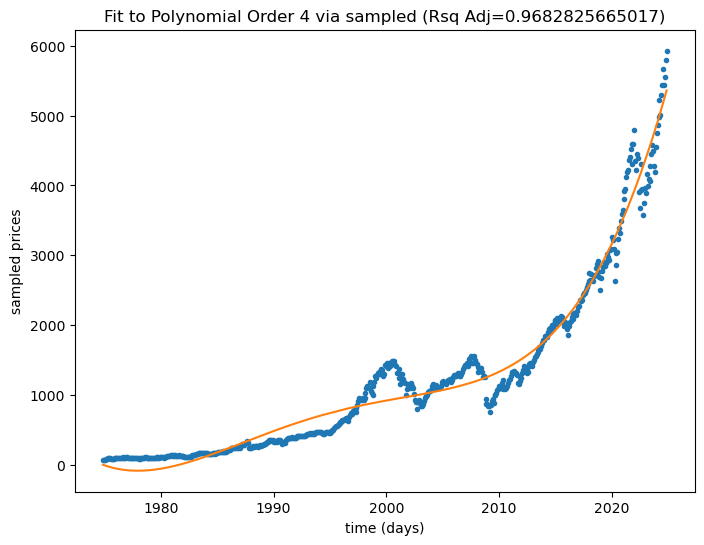

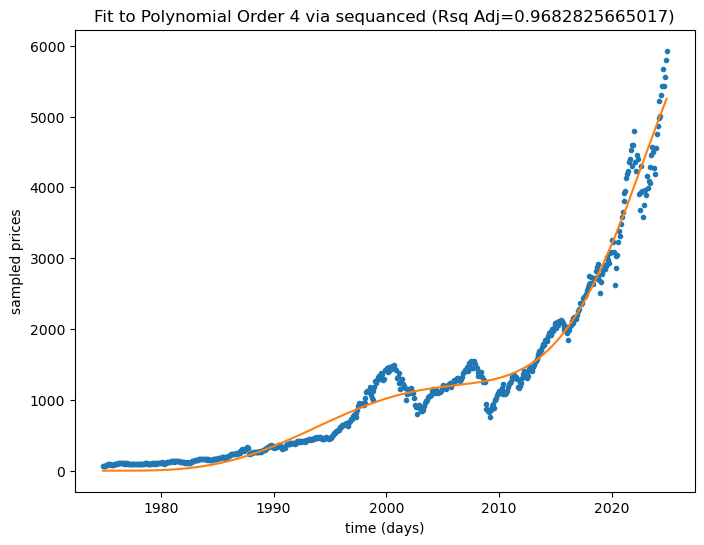

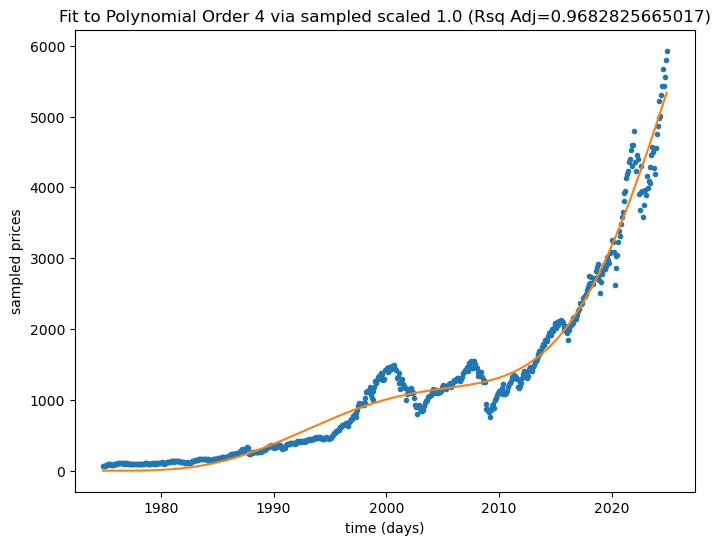

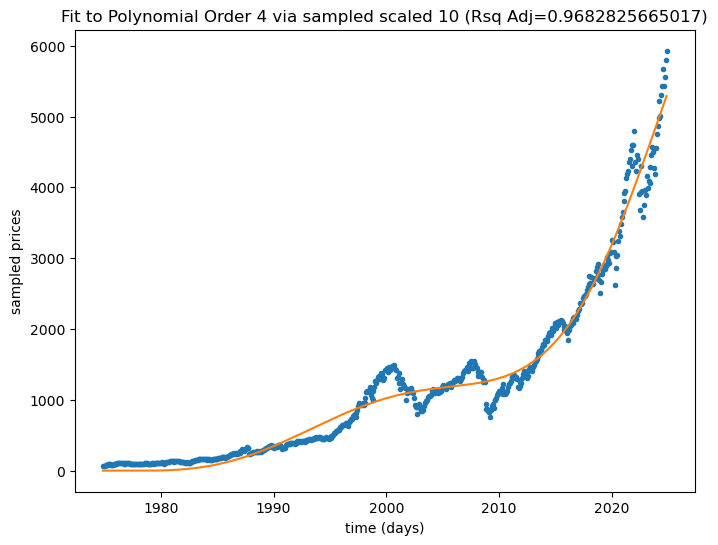

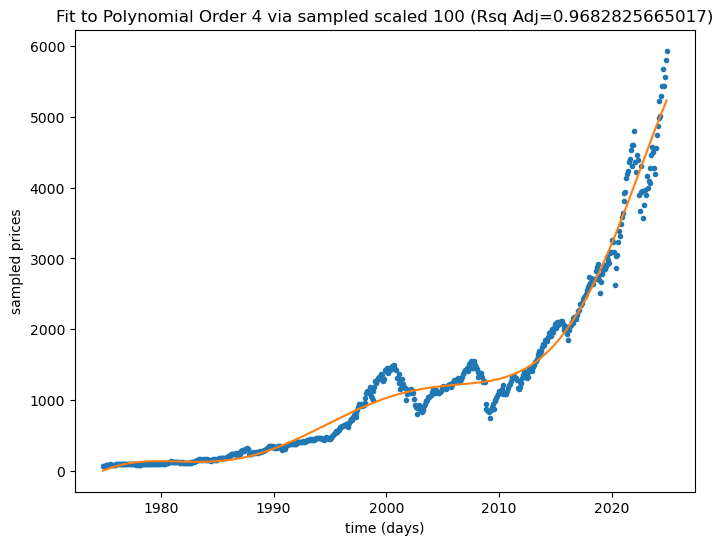

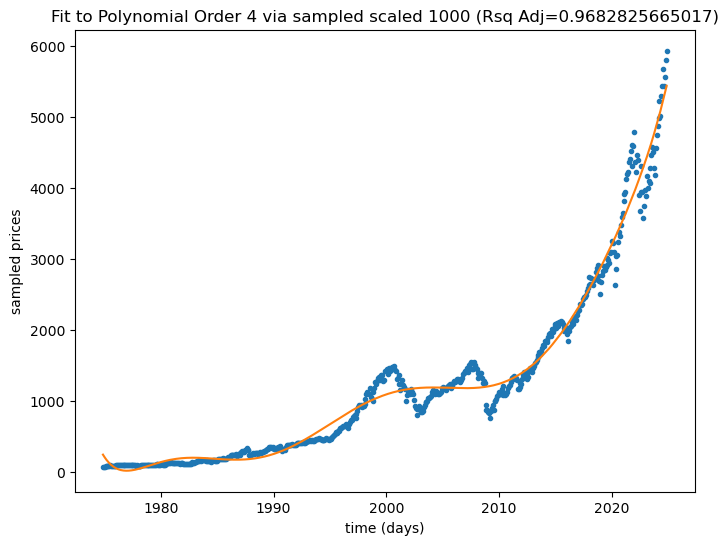

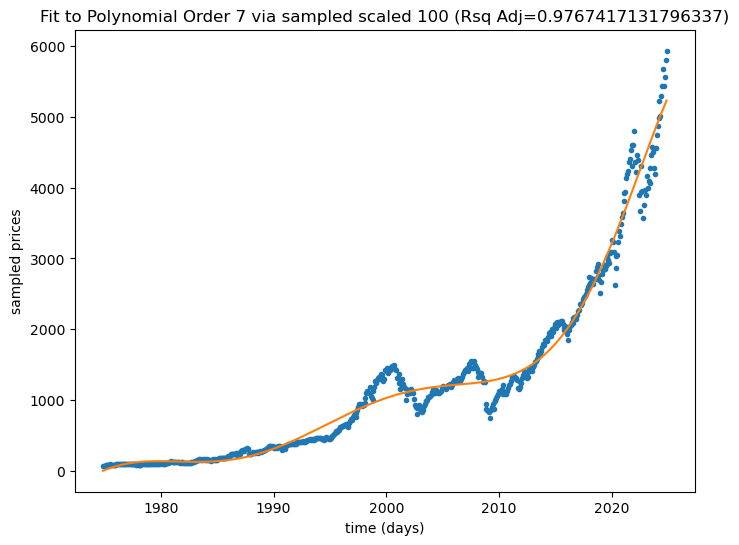

In [11]:


### fit trend line
maxPolyOrder = 8
# need consecutive numbers, not dates, values not important, evenly spaced
x = np.arange(0,len(dates),1)
n = len(dates)
inds = np.arange(0,n,sampFreq)
x_samp = x[inds]


rsqAdj, name, model, prices_sampHat = genStats.fit_simp_model(x_samp, prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_samp, prices_samp,'.',dates_samp,prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled (Rsq Adj='+str(rsqAdj)+')')
plt.show()


_x_samp = np.arange(0,len(dates_samp),1)
_rsqAdj, _name, _model, _prices_sampHat = genStats.fit_simp_model(_x_samp/1.0, prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_samp, prices_samp,'.',dates_samp,_prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sequanced (Rsq Adj='+str(rsqAdj)+')')
plt.show()


__rsqAdj, __name, __model, __prices_sampHat = genStats.fit_simp_model(x_samp/1., prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_samp, prices_samp,'.',dates_samp,__prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled scaled 1.0 (Rsq Adj='+str(rsqAdj)+')')
plt.show()


__rsqAdj, __name, __model, __prices_sampHat = genStats.fit_simp_model(x_samp/10., prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_samp, prices_samp,'.',dates_samp,__prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled scaled 10 (Rsq Adj='+str(rsqAdj)+')')
plt.show()

__rsqAdj, __name, __model, __prices_sampHat = genStats.fit_simp_model(x_samp/100., prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_samp, prices_samp,'.',dates_samp,__prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled scaled 100 (Rsq Adj='+str(rsqAdj)+')')
plt.show()

__rsqAdj, __name, __model, __prices_sampHat = genStats.fit_simp_model(x_samp/1000., prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_samp, prices_samp,'.',dates_samp,__prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled scaled 1000 (Rsq Adj='+str(rsqAdj)+')')
plt.show()

# in thory we can arbitrarily set it, but due to the numerics of 
# the OLS solver, it seems like this scaling prevents wierdness
# in how the early dates are fit (some weighting issue)
xScaleFact = 100
x_samp = x_samp/xScaleFact
# for future sake need to keep these treated the same
x4Fit = x/xScaleFact

rsqAdj, name, model, prices_sampHat = genStats.fit_simp_model(x_samp, prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_samp, prices_samp,'.',dates_samp,prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled scaled 100 (Rsq Adj='+str(rsqAdj)+')')
plt.show()


We found an excelent fit, adjusted r-squared of 0.98, 
with a poly order 7 and x values scaled by 100.

### ii. Define Deviations
We considered the price to be based on both a 'drift' and a 'noise' term.
In a perfect world, the drift would be defined by the trend and 
the noise by a uniformly distributed independnat random variable.
However (and as expected), there are clear deviations away from and 
back to the trend line over meaningfully long periods.
These are also easy to link to particular market events known to effect
the overall US economy.
In Project 202410, we chose to purse these further as abnormal deviations events.
We did the same here by considering the dispersion around the trend line
and the prices that are abnormally high or low.
Specifcally, we considered the possibility +/- 
one standard deviation (normality assumption),
the Median Absolute Deviation (MAD; corrected to match stdev under normality),
and the upper 32 percentile (corrisponds with st dev under normallity with large n)
as a definition for abnormal price behaviour.



Dispersions
----------------
method --- value
----------------
MAD --- 0.18877273310824227
Quant --- 0.18904287485636848
Normal --- 0.5054434233692116


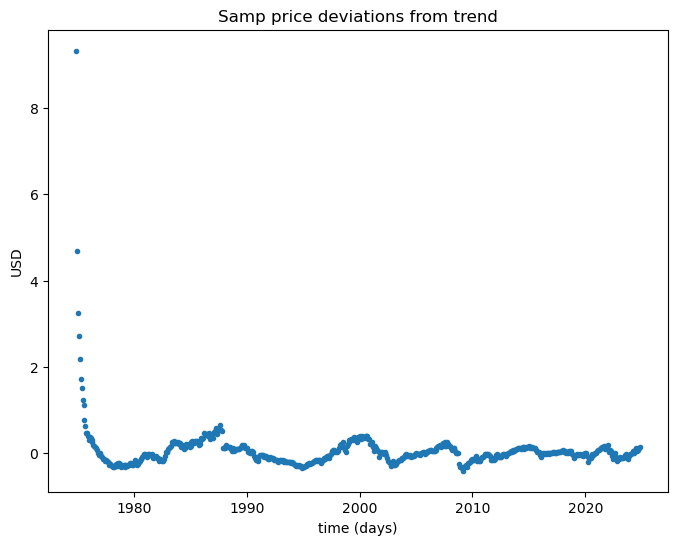

In [12]:
# consider deviations
methods = ['MAD','Quant','Normal']
sigmas = []

# get deviations
devs = genFin.dev(prices_samp,prices_sampHat)

print('Dispersions')
print('----------------')
print('method --- value')
print('----------------')

for method in methods:
    sigma = genStats.disper(devs,method=method)
    sigmas.append(sigma)
    print(method+' --- '+str(sigma))


# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(dates_samp, devs,'.')
plt.xlabel('time (days)')
plt.ylabel('USD')
plt.title('Samp price deviations from trend')
plt.show()



### iii. Identify Deviation Events
We defined a deviation event as a sequence of consecutive price
deviations that stay above the abnormal deviation threshold.
This period, in total, would be one deviation event of some period length.

Note: unlike the statistical tests where we used the sampled data, 
here we considered different resolutiobs starting with the full data set.
This is because we do not need the data set to be independently distributed.
In fact, we are in some sense suggesting that there is a dependance 
between the prices in a given event period.
This is somewhat related to the observations of long-term price memory 
in other projects and why we had to base sampiling on the return.

-------------------------------
---Deviations Root From Days---
-------------------------------


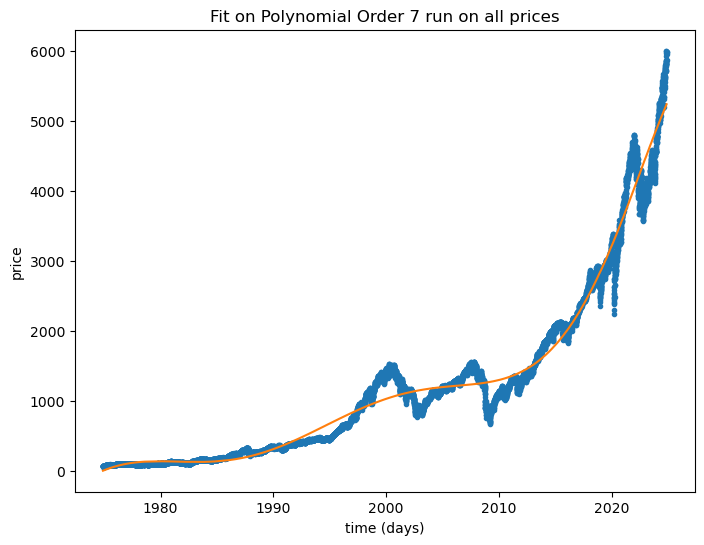

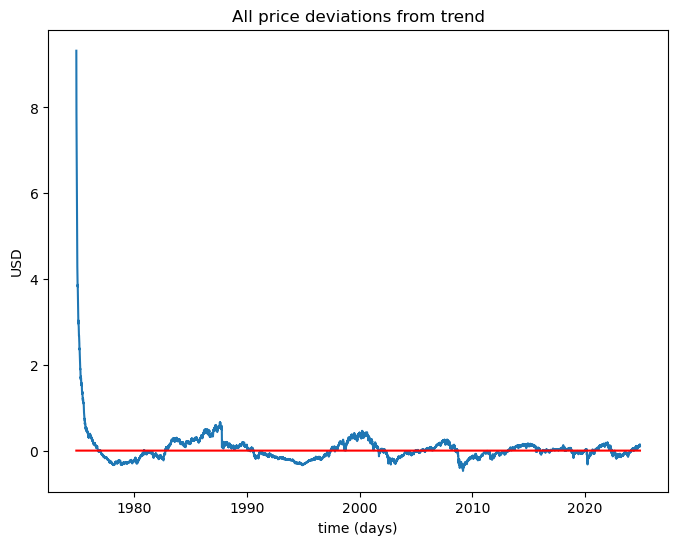

Threshold: 0.18877273310824227
Method: MAD
Number of Events: 103
Expected Event Length (M): 0.19047619047619047
Abnormal Event Length (M): 0.4022765074055622
Rare Event Length (M): 0.8258771412643056
Crazy Event Length (M): 1.249477775123049
Event Lengths:
[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00
 2.000e+00 2.000e+00 2.000e+00 2.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 4.000e+00 4.000e+00 4.000e+00 5.000e+00 5.000e+00
 5.000e+00 5.000e+00 5.000e+00 5.000e+00 6.000e+00 6.000e+00 6.000e+00
 6.000e+00 6.000e+00 6.000e+00 7.000e+00 8.000e+00 8.000e+00 8.000e+00
 1.000e+01 1.000e+01 1.000e+01 1.

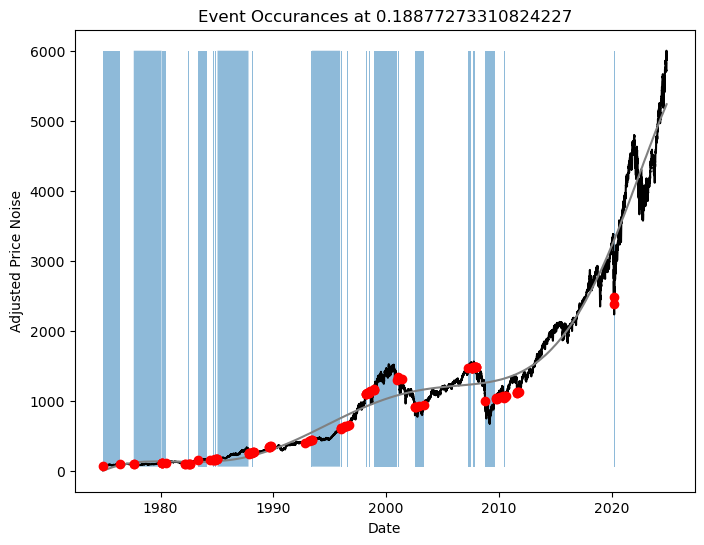

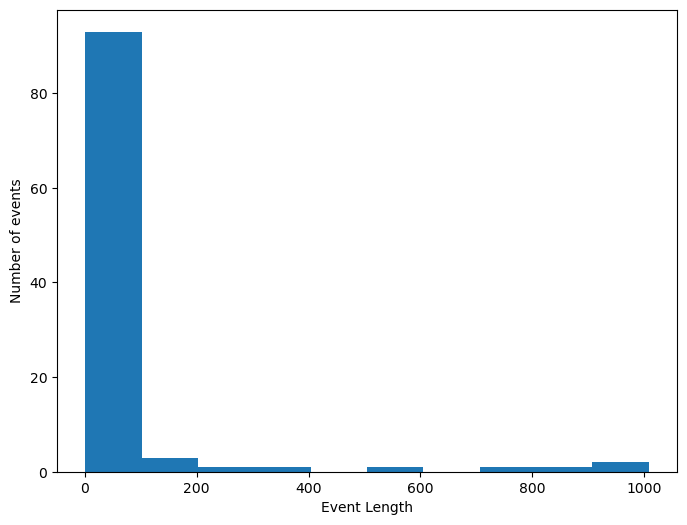

Threshold: 0.18904287485636848
Method: Quant
Number of Events: 104
Expected Event Length (M): 0.19047619047619047
Abnormal Event Length (M): 0.47619047619047616
Rare Event Length (M): 1.0476190476190474
Crazy Event Length (M): 1.6190476190476188
Event Lengths:
[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   3.   3.   3.
   3.   3.   3.   3.   3.   3.   3.   3.   3.   4.   4.   4.   5.   5.
   5.   5.   5.   5.   6.   6.   6.   6.   6.   6.   7.   8.   8.   8.
  10.  10.  10.  11.  11.  11.  11.  13.  13.  14.  14.  15.  17.  18.
  22.  23.  28.  34.  36.  46.  48.  55.  91. 102. 106. 164. 254. 298.
 342. 548. 736. 753. 900. 913.]
Total Time:
5871.0


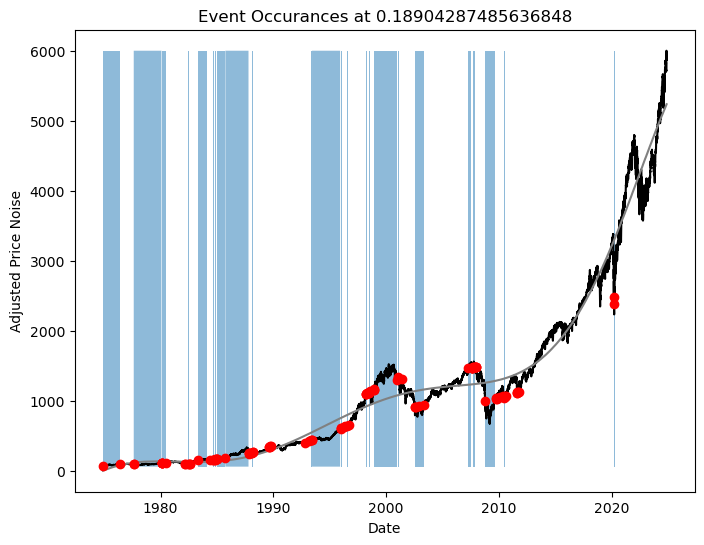

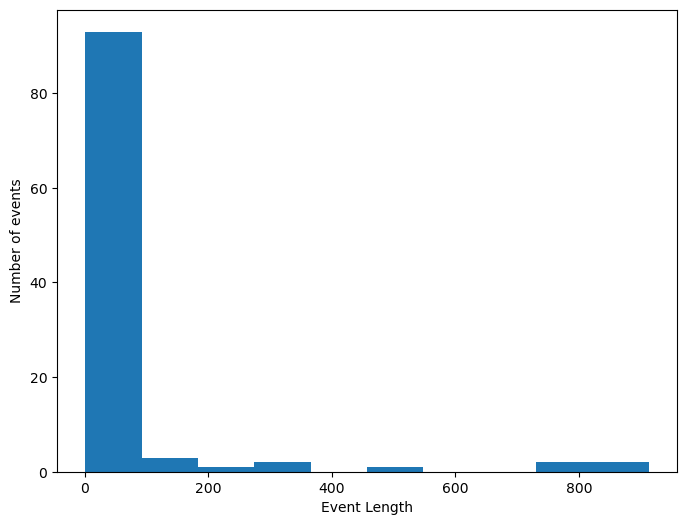

Threshold: 0.5054434233692116
Method: Normal
Number of Events: 12
Expected Event Length (M): 2.091269841269841
Abnormal Event Length (M): 6.146279822278782
Rare Event Length (M): 14.256299784296665
Crazy Event Length (M): 22.366319746314545
Event Lengths:
[  1.   1.   1.   1.   4.   5.   9.  10.  11.  59. 123. 302.]
Total Time:
527.0


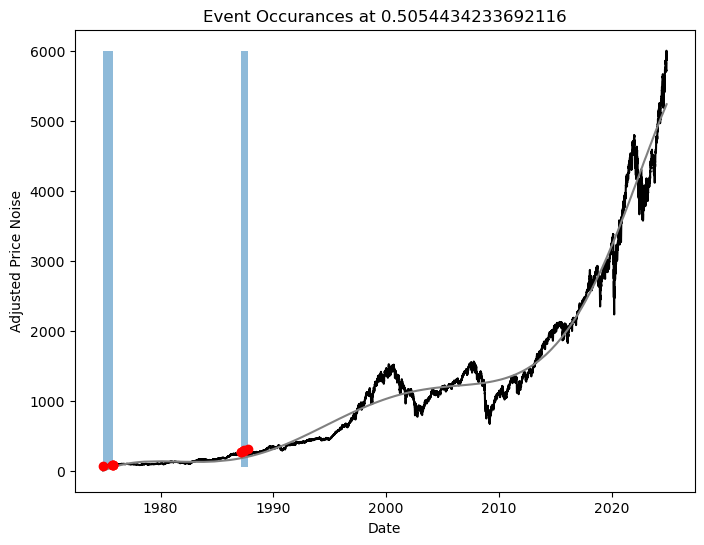

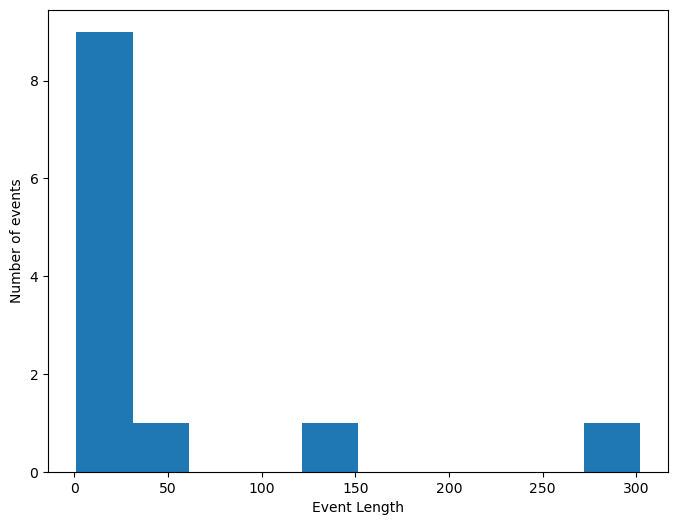

-------------------------------
--Deviations Root From Months--
-------------------------------


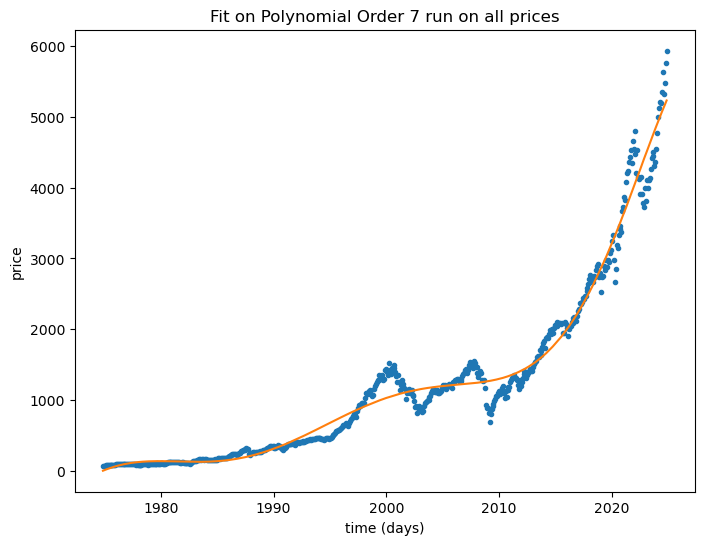

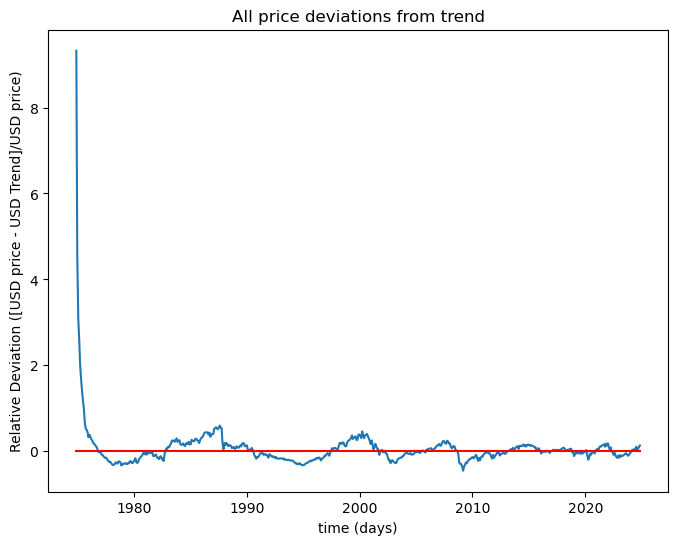

Threshold: 0.18877273310824227
Method: MAD
Number of Events: 25
Expected Event Length (M): 2.8095238095238093
Abnormal Event Length (M): 4.927526978817527
Rare Event Length (M): 9.163533317404962
Crazy Event Length (M): 13.399539655992395
Event Lengths:
[  29.   29.   29.   30.   30.   30.   30.   30.   31.   32.   32.   32.
   59.   61.   62.   91.   91.  273.  304.  336.  577.  761.  910.  972.
 1001.]
Total Time:
5862.0


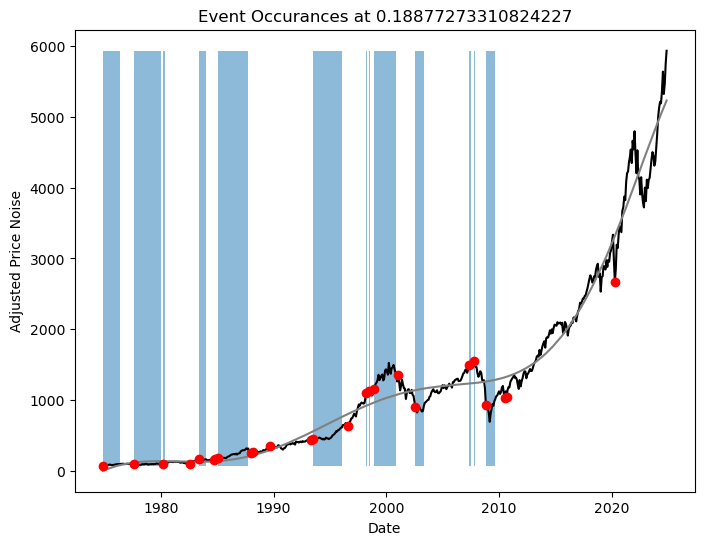

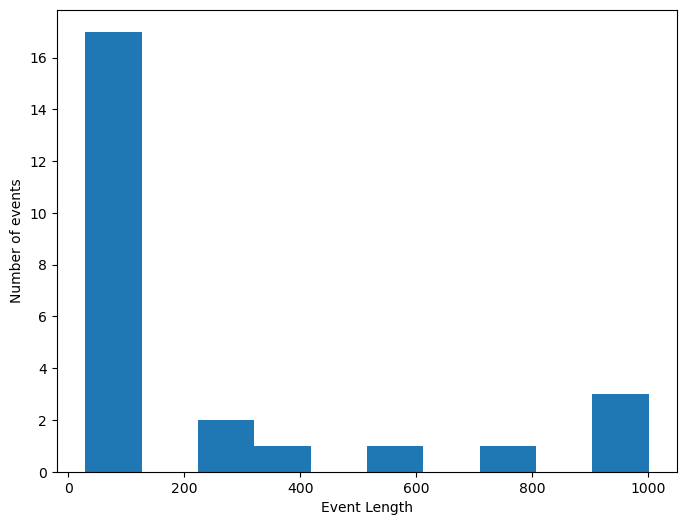

Threshold: 0.18904287485636848
Method: Quant
Number of Events: 25
Expected Event Length (M): 2.8095238095238093
Abnormal Event Length (M): 13.0
Rare Event Length (M): 33.38095238095238
Crazy Event Length (M): 53.76190476190476
Event Lengths:
[  29.   29.   29.   30.   30.   30.   30.   30.   31.   32.   32.   32.
   59.   61.   62.   91.   91.  273.  304.  336.  577.  761.  910.  972.
 1001.]
Total Time:
5862.0


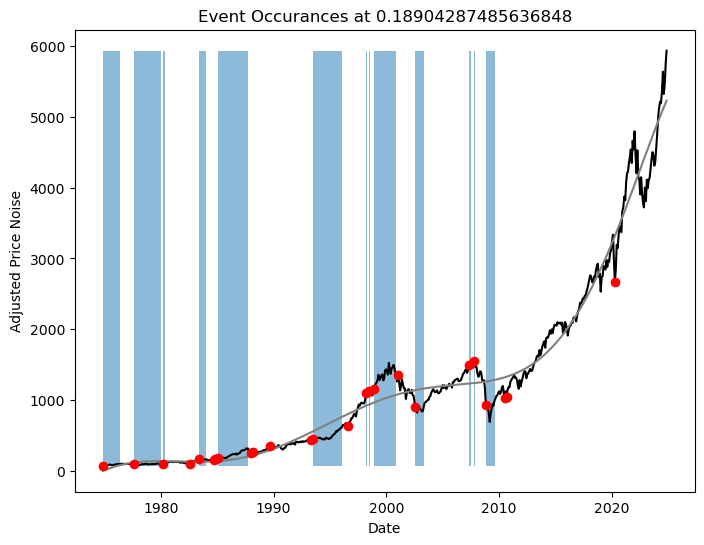

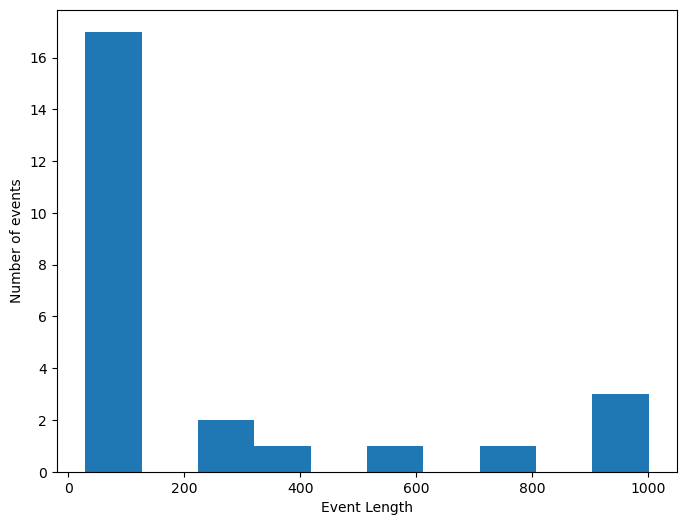

Threshold: 0.5054434233692116
Method: Normal
Number of Events: 2
Expected Event Length (M): 14.404761904761905
Abnormal Event Length (M): 15.857142857142858
Rare Event Length (M): 18.761904761904763
Crazy Event Length (M): 21.666666666666668
Event Lengths:
[272. 333.]
Total Time:
605.0


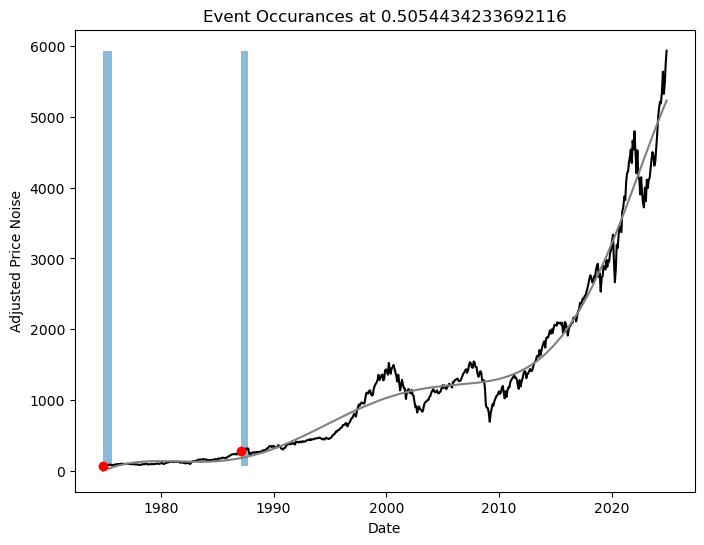

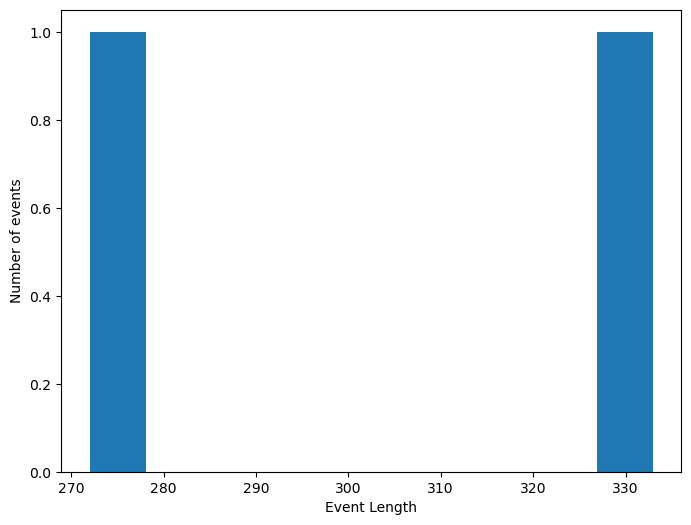

------------------------------
--Deviations Root From Years--
------------------------------


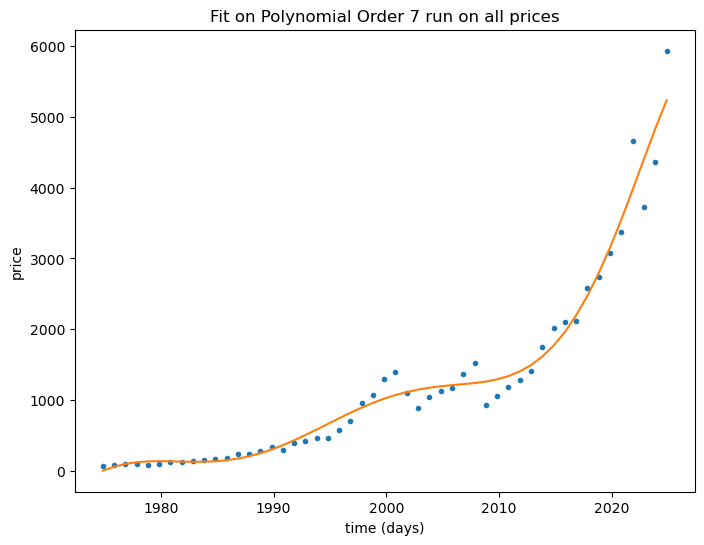

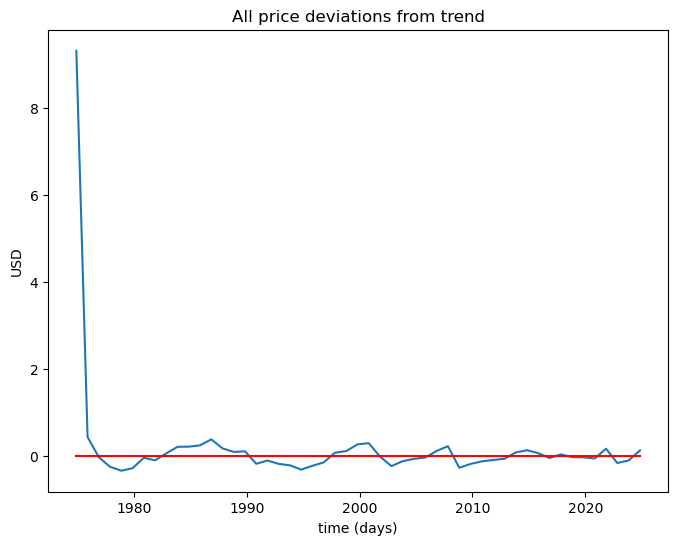

Threshold: 0.18877273310824227
Method: MAD
Number of Events: 7
Expected Event Length (M): 35.0
Abnormal Event Length (M): 60.20423771459524
Rare Event Length (M): 110.6127131437857
Crazy Event Length (M): 161.02118857297617
Event Lengths:
[ 365.  729.  730.  735. 1092. 1093. 1457.]
Total Time:
6201.0


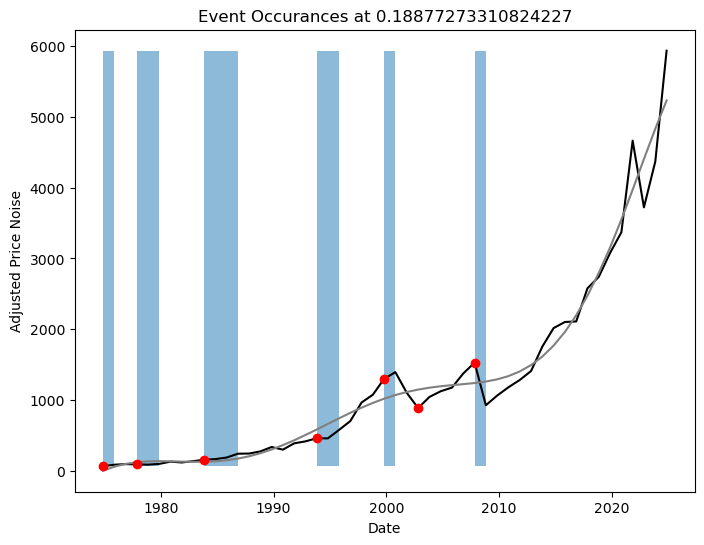

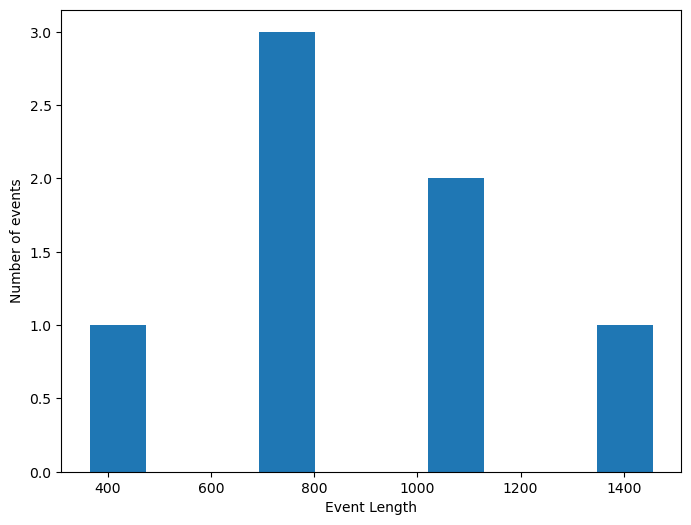

Threshold: 0.18904287485636848
Method: Quant
Number of Events: 7
Expected Event Length (M): 35.0
Abnormal Event Length (M): 52.04761904761905
Rare Event Length (M): 86.14285714285714
Crazy Event Length (M): 120.23809523809524
Event Lengths:
[ 365.  729.  730.  735. 1092. 1093. 1457.]
Total Time:
6201.0


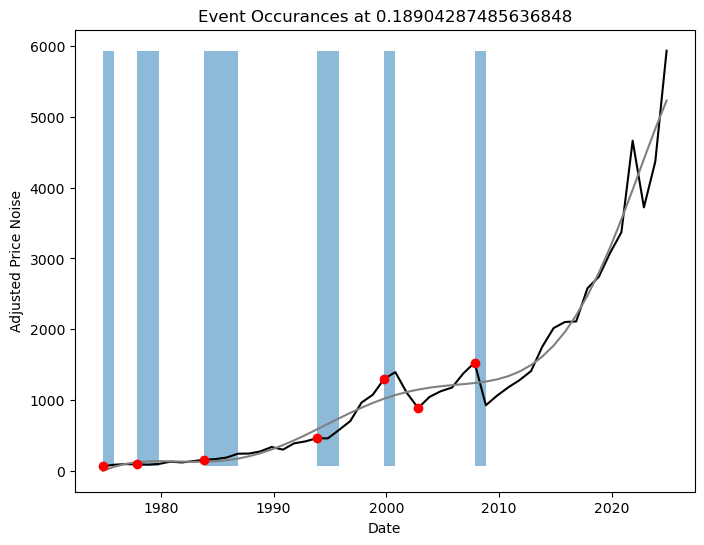

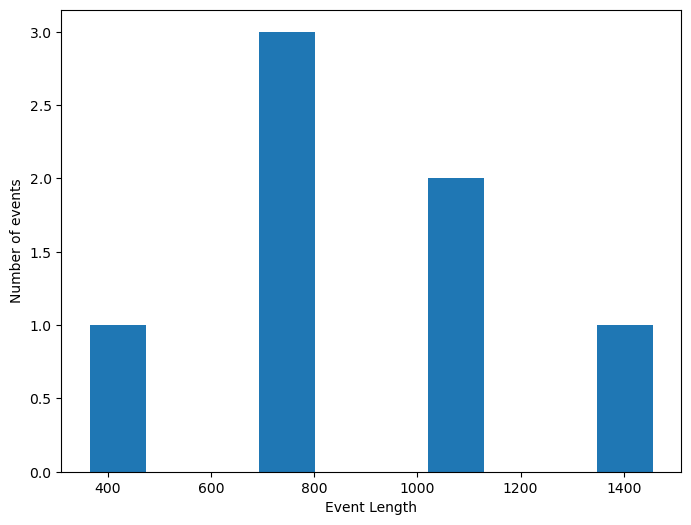

Threshold: 0.5054434233692116
Method: Normal
Number of Events: 1
Expected Event Length (M): 17.333333333333332
Abnormal Event Length (M): 17.333333333333332
Rare Event Length (M): 17.333333333333332
Crazy Event Length (M): 17.333333333333332
Event Lengths:
[364.]
Total Time:
364.0


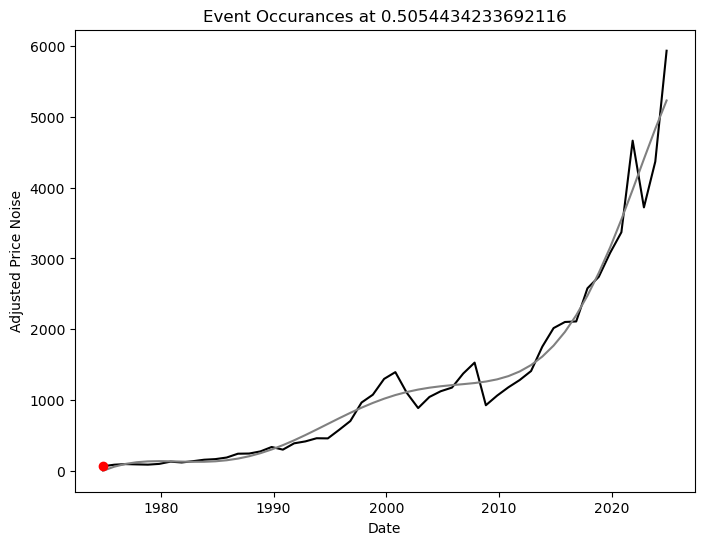

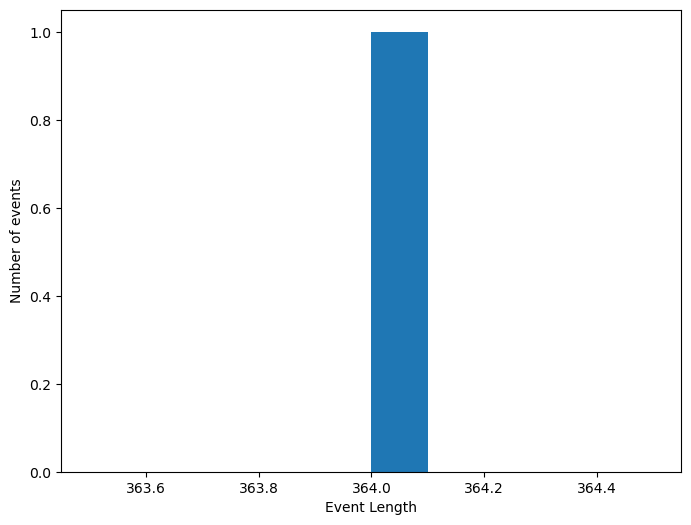

In [13]:
# first we need the trend for the whole data set

# get values
pricesHat = model.predict(genStats.x2X(x4Fit,name))


print('-------------------------------')
print('---Deviations Root From Days---')
print('-------------------------------')


# get the disiered subset
n=len(dates)
inds=np.arange(0,n,1)
x=dates[inds]
y=prices[inds]
yHat=pricesHat[inds]



# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(x, y,'.',x,yHat,'-')
plt.xlabel('time (days)')
plt.ylabel('price')
plt.title('Fit on '+name+' run on all prices')
plt.show()

devs = genFin.dev(y,yHat)
absDevs = np.abs(devs)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(x, devs)
plt.plot(x, devs*0,'-r')
plt.xlabel('time (days)')
plt.ylabel('USD')
plt.title('All price deviations from trend')
plt.show()
    

# Cycle through metrics for deviations
n = len(sigmas)
for i in range(n):

    method = methods[i]
    thresh = sigmas[i]
    
    # flag deviations for this metric
    eventInd, eventTime, eventLength = apa.flag_dev_event(x,y,yHat,thresh)

    # need floats not timedelays for some processing
    eventDays=utils.ns2days(eventLength)
    
    print('Threshold: '+str(thresh))
    print('Method: '+method)
    print('Number of Events: '+str(len(eventTime)))
    if method=='Normal':
        eventExp = np.mean(eventDays)/month2days
    else:
        eventExp = np.median(eventDays)/month2days
    print('Expected Event Length (M): '+str(eventExp))
    eventDisper = genStats.disper(eventDays,method)/month2days
    print('Abnormal Event Length (M): '+str(eventExp+eventDisper))
    print('Rare Event Length (M): '+str(eventExp+3*eventDisper))
    print('Crazy Event Length (M): '+str(eventExp+5*eventDisper))
    print('Event Lengths:')
    print(np.sort(eventDays))
    print('Total Time:')
    print(np.sum(eventDays))
    inds = np.array(eventInd)
    
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.plot(x, y,color='black')
    plt.plot(x, yHat,color='gray')
    plt.plot(x[eventInd],y[eventInd],'or')

    plt.fill_between(x, min(y), max(y), where=(absDevs > thresh), alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('Adjusted Price Noise')
    plt.title('Event Occurances at ' + str(thresh))
    plt.show()

    
    plt.figure(figsize=(8, 6))
    plt.hist(eventDays)
    plt.xlabel('Event Length')
    plt.ylabel('Number of events')
    plt.title('')
    plt.show()

# get the disiered subset
n=len(dates)
inds=np.arange(0,n,month2days)
x=dates[inds]
y=prices[inds]
yHat=pricesHat[inds]

print('-------------------------------')
print('--Deviations Root From Months--')
print('-------------------------------')

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(x, y,'.',x,yHat,'-')
plt.xlabel('time (days)')
plt.ylabel('price')
plt.title('Fit on '+name+' run on all prices')
plt.show()

devs = genFin.dev(y,yHat)
absDevs = np.abs(devs)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(x, devs)
plt.plot(x, devs*0,'-r')
plt.xlabel('time (days)')
plt.ylabel('Relative Deviation ([USD price - USD Trend]/USD price)')
plt.title('All price deviations from trend')
plt.show()
    

# Cycle through metrics for deviations
n = len(sigmas)
for i in range(n):

    method = methods[i]
    thresh = sigmas[i]
    
    # flag deviations for this metric
    eventInd, eventTime, eventLength = apa.flag_dev_event(x,y,yHat,thresh)

    # need floats not timedelays for some processing
    eventDays=utils.ns2days(eventLength)
    
    print('Threshold: '+str(thresh))
    print('Method: '+method)
    print('Number of Events: '+str(len(eventTime)))
    if method=='Normal':
        eventExp = np.mean(eventDays)/month2days
    else:
        eventExp = np.median(eventDays)/month2days
    print('Expected Event Length (M): '+str(eventExp))
    eventDisper = genStats.disper(eventDays,method)/month2days
    print('Abnormal Event Length (M): '+str(eventExp+eventDisper))
    print('Rare Event Length (M): '+str(eventExp+3*eventDisper))
    print('Crazy Event Length (M): '+str(eventExp+5*eventDisper))
    print('Event Lengths:')
    print(np.sort(eventDays))
    print('Total Time:')
    print(np.sum(eventDays))
    inds = np.array(eventInd)
    
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.plot(x, y,color='black')
    plt.plot(x, yHat,color='gray')
    plt.plot(x[eventInd],y[eventInd],'or')

    plt.fill_between(x, min(y), max(y), where=(absDevs > thresh), alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('Adjusted Price Noise')
    plt.title('Event Occurances at ' + str(thresh))
    plt.show()

    
    plt.figure(figsize=(8, 6))
    plt.hist(eventDays)
    plt.xlabel('Event Length')
    plt.ylabel('Number of events')
    plt.title('')
    plt.show()


# get the disiered subset
n=len(dates)
inds=np.arange(0,n,12*month2days)
x=dates[inds]
y=prices[inds]
yHat=pricesHat[inds]

print('------------------------------')
print('--Deviations Root From Years--')
print('------------------------------')

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(x, y,'.',x,yHat,'-')
plt.xlabel('time (days)')
plt.ylabel('price')
plt.title('Fit on '+name+' run on all prices')
plt.show()

devs = genFin.dev(y,yHat)
absDevs = np.abs(devs)

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(x, devs)
plt.plot(x, devs*0,'-r')
plt.xlabel('time (days)')
plt.ylabel('USD')
plt.title('All price deviations from trend')
plt.show()
    

# Cycle through metrics for deviations
n = len(sigmas)
for i in range(n):

    method = methods[i]
    thresh = sigmas[i]
    
    # flag deviations for this metric
    eventInd, eventTime, eventLength = apa.flag_dev_event(x,y,yHat,thresh)

    # need floats not timedelays for some processing
    eventDays=utils.ns2days(eventLength)
    
    print('Threshold: '+str(thresh))
    print('Method: '+method)
    print('Number of Events: '+str(len(eventTime)))
    if method=='Normal':
        eventExp = np.mean(eventDays)/month2days
    else:
        eventExp = np.median(eventDays)/month2days
    print('Expected Event Length (M): '+str(eventExp))
    eventDisper = genStats.disper(eventDays,method)/month2days
    print('Abnormal Event Length (M): '+str(eventExp+eventDisper))
    print('Rare Event Length (M): '+str(eventExp+3*eventDisper))
    print('Crazy Event Length (M): '+str(eventExp+5*eventDisper))
    print('Event Lengths:')
    print(np.sort(eventDays))
    print('Total Time:')
    print(np.sum(eventDays))
    inds = np.array(eventInd)
    
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.plot(x, y,color='black')
    plt.plot(x, yHat,color='gray')
    plt.plot(x[eventInd],y[eventInd],'or')

    plt.fill_between(x, min(y), max(y), where=(absDevs > thresh), alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('Adjusted Price Noise')
    plt.title('Event Occurances at ' + str(thresh))
    plt.show()

    
    plt.figure(figsize=(8, 6))
    plt.hist(eventDays)
    plt.xlabel('Event Length')
    plt.ylabel('Number of events')
    plt.title('')
    plt.show()




First we noted that depending on the sampling root frequency,
we had significantly different expected event lengths.
This is not supprising as it sets the minimum event size.
We then noted that assuming a normal distribution typically 
led to larger event times estimates and deviations.
This is because event sizes are not normally distributed 
and there are a small number of very long evnts.
We found that robust estimators are similar at shorter root frequencies.
At large root times, e.g. one year, MAD was much different, 
but in this case there are very few deviation events to estiamte from.

We chose to use months as a root frequency as it is 
on the long side, realtes to everyday life and is consistant with 
the time lag for how we calculated returns.
We also chose MAD as it is a robust estimator and is easy to understand.
It is also consistant with how the thresholds were calculated above.

Given these choices, 
we found the expected time for an abnormal event to be about four months.
Unusual event lenthgs are between 8.5 and 17 months (1 and 3 deivations
with extreamlly rare events being longer than 25 months (5 deviations).
We use this data to support the suggestion to long- and mid-term investors that: 
* abnormal events, as the name suggests, are not common but are to be expected;
* abnormal events are expected to last about 4-8.5 months;
* regular reallocation via standard optimization should be around 6 months;
* early exiting or entering this stock should not be driven only by recent price trends less than 8 months
* some investors with shorter time horizans may want to consider re-allocation based on other market factors for events lasting longer than 18 months;
* out side of other major facotres, true long-term/ buy-and-hold investors should consider <emph>not</emph> making major changes based on events shorter than 17 months;  
* all investors are encuraged to consider re-allocation based on other market factors for events lasting longer than 17 months;
* events lasting longer that 25 months are of extream concern and may indicate fundemental changes.  

Out of personal interest we note that time-scales  
based on a one day root frequency may be of intrest to 
short-term investors/ swing traders.
The would suggest reallocation by optimization every 1-2 weeks.
Recovery from short term abnormal events should be expected by 1 month.
Early exiting or entering should be considered after 4-6 weeks
of abnormal price deviation despite previous intnetions.
Of course, short-term investors should always be very 
aware of other market factros and types of analysis.
 

Note: reallocation is changing the protfolio percentage accosiated with the assets
and does not consider the regular sale or purchase of an asset to maintain balance.  
Rebalancing should be done far more frequently, 
and we suggest a time frame convienent for regular investment installments.
For long- or mid-term investors with regular income, 
we suggest rebalancing every month and to use a buy only strategy to avoid
capital gains taxes.
We also note that reallocation based on optimization can also be done more frequently, particularly if the method is robust and considers large amounts
of historical price data. 
This is because it would be fairly unaffected by a sudden price change.

## IV. Sampiling Period
The Mean-Variance analysis of Modern Portfolio Theory relies on 
statistical estimates of a expected return and risk 
(variance or other dispersion metric) parameters.
As shown above, we have considered median realitive return 
and its Median Absolute Deviation (MAD).
To calculate these, 
we need a proper sampiling frequency (determined in Section II)
and a sampiling period (number of consecutive time points to analyze over).

Previous analysies have shown that short sampiling periods lead to 
low-biased estimates of risk, as expected with small sample sizes.
However, long sampling periods (10, 20, 50 years) may not be avalible,
require additional compute resources and may not hold information relavant 
to the current market.

Here we simplified the method from projects 202409 and 202407.
We considered the period selection problem to be a 
standard paramater optimization problem.
Given that the goal of estimating a return over a given period 
is to use that as an estimate for future returns,
we chose to use the estimated expected return for a given period length
as the 'predictor' and to use some future return as the 'actual' observation.
For this future or actual return 
we chose a time delta equivlant to the suggested reallocation time (6mo).
That is, given a set of historical price data a sequance of data
over some period lenght chosen.
An estimated of the expected return is calculated over this period.
This is the compared to the return 6 months following the end of the period.

The objective function was simply normalized squared error,
where the normalization factor could be
one (absolute error), 
the expected return (relative error) or
the estimated dispersion (risk adjusted error).
The errors were calculated at every point along the time course
and the expected error was reported 
(median or mean squared error for the robust or normal method, respectivly). 







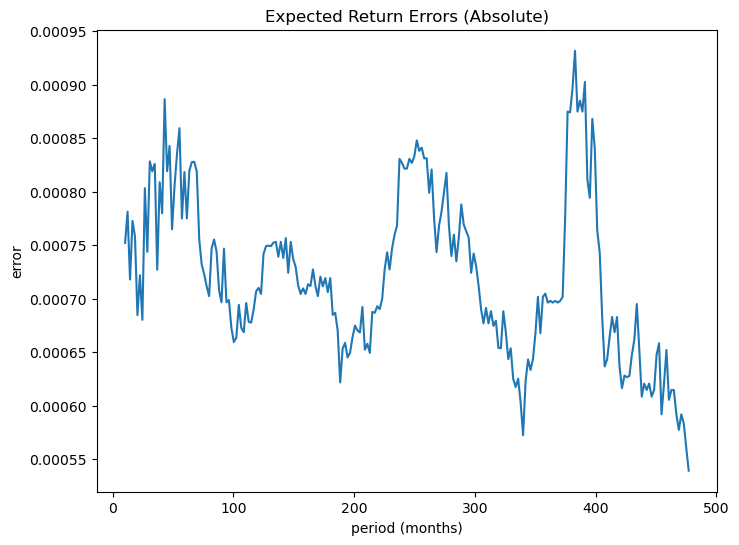

- Min Error: 0.0005391123335281402
- Min Period: 477.0952380952381


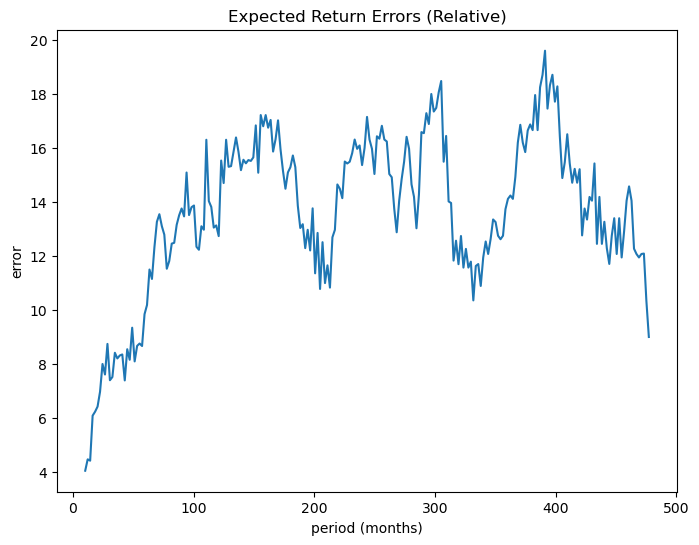

- Min Error: 4.06144799705125
- Min Period: 10.238095238095237


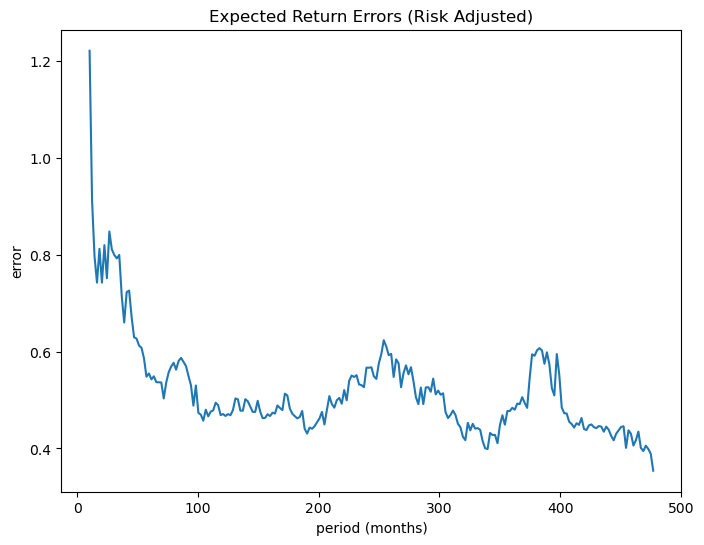

- Min Error: 0.35405102960231166
- Min Period: 477.0952380952381


In [9]:
# set method for estimatig return properties
method='Robust'
# reallocation time determined above
# used for delta between estimate and actual return
# 6 months in trading days
actDelta = 6*21
# adjust for samp freq (must be int)
actDelta = int(actDelta/sampFreq)

# set a max length based on total possible length (must be int)
pMax = int(0.80*len(returns_samp))
# requiering at least  data points for min
pMin = 5

# get the period range for later use
period = np.arange(pMin,pMax,1)
# for readability change to months
period = period*sampFreq/month2days

# get the errors
error = apa.calc_period_error(returns_samp,pMin,pMax,actDelta,method=method)

# Plot the data 
plt.figure(figsize=(8, 6))
plt.plot(period, error)
plt.xlabel('period (months)')
plt.ylabel('error')
plt.title('Expected Return Errors (Absolute)')
plt.show()

# find and print minimum
minInd = np.argmin(error)
print('- Min Error: '+str(error[minInd]))
print('- Min Period: '+str(period[minInd]))

# get the errors
error = apa.calc_period_error(returns_samp,pMin,pMax,actDelta,scale='Expected',method=method)

# Plot the data 
plt.figure(figsize=(8, 6))
plt.plot(period, error)
plt.xlabel('period (months)')
plt.ylabel('error')
plt.title('Expected Return Errors (Relative)')
plt.show()

# find and print minimum
minInd = np.argmin(error)
print('- Min Error: '+str(error[minInd]))
print('- Min Period: '+str(period[minInd]))


# get the errors
error = apa.calc_period_error(returns_samp,pMin,pMax,actDelta,scale='Disp',method=method)

# Plot the data 
plt.figure(figsize=(8, 6))
plt.plot(period, error)
plt.xlabel('period (months)')
plt.ylabel('error')
plt.title('Expected Return Errors (Risk Adjusted)')
plt.show()

# find and print minimum
minInd = np.argmin(error)
print('- Min Error: '+str(error[minInd]))
print('- Min Period: '+str(period[minInd]))




As expected we found
short periods (i.e. small sample sizes) gave high errors 
that were rapidly reduced with increased length.
We primarily focused on Risk Adjusted Error
(expectation normalized by dispersion) 
because it directly relates to the mean-variance method 
of optimizing expected return over risk.
This suggested a period of 235 months for best results.
The risk adjusted error found was 0.34,
which demonstrats that a future return typically deveiated
from the expected return less than the estimated dispersion.
Since we focused on robust statistics these means the 
median estimated from periods of 235 months deviated from a future return 
by less than the estimated median absolute deviation over the same period.
The other error metrics were also near minimum at this timae frame.

This shows that using
a sampling frequency of 38 trading days,
a sample period of 233 months,
a robust method for return parameter estimates,
and a reallcation target of ~6 months
we could typically expect a future return to 
be within the estimated deviation.
We found this to be a sufficent result.

We alo note that the relative error showed the deviation in returns 
to be greater than the return itself.
However, it is significantly reduced at 233 months compared to 
lower periods.
So estimates using periods of less than a year were poor 
compared to periods of 20 years.
Not a suprisig result.

While 20 year periods produced near minimum errors
we observed a significant drop off in errors at 
period lengths over even 8.5 years.


We note that 
in all metrics very long periods actually produced worsening results
evidance that long histories are not relavant and a sweet spot exists
also, for risk adjusted error (and to a worse extent relative error)
the valley around 233 is deep but narrow.
Showing sensitivity to period length and
suggesting that such a sweet spot may vary signifcantly from one asset to another.
Ultimatly, however, more historical data is not always better.
We warn that in a set history there are far fewer samples 
avalible to make estimates for such long periods,
and this leads to poor confidance in error estimates for long periods.
It is very possible that this observation may not reproduce given 
different assets or longer histories to study.

Intresting but not shown
we found qualitativly and quantitativly similar results for 
1 and 12 month reallocation time (or comparision deltas).
We found it a bit unusual that the results even held
for long reallocation times, 50 months.
However, the maximum errors (errors at shorter periods)
did show significant increases when comparing to 
returns 50 months out.
Taken together, a sufficnet period length of 233 months 
provides statistiacal estimates that hold over long times
while estimates from short periods are only relavant to 
near future returns.
Again, consistant with our expectations.

For consideration we also considered estimation methods 
under the standard normally distributed assumption.


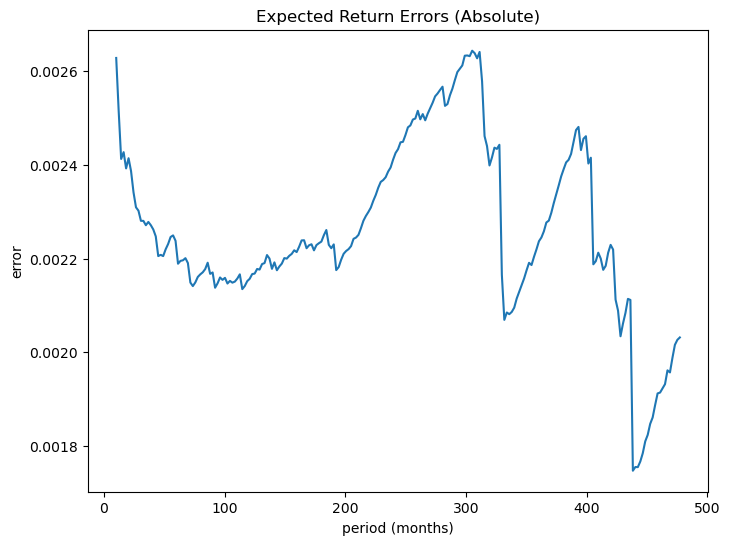

- Min Error: 0.0017476767527656906
- Min Period: 438.1904761904762


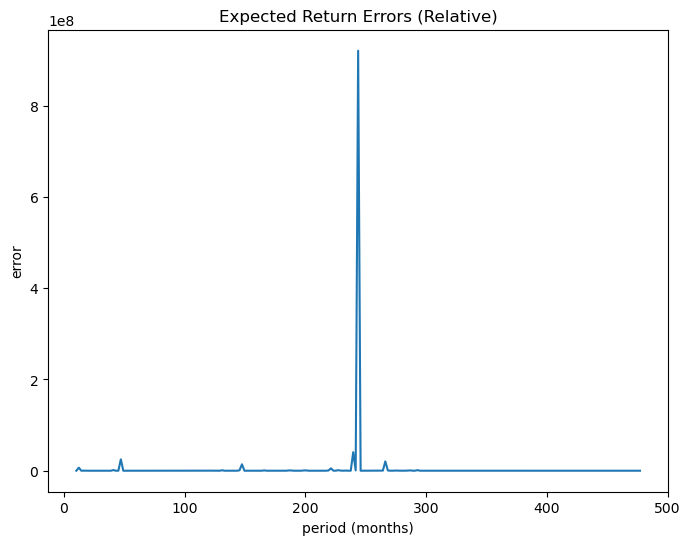

- Min Error: 87.53922266572673
- Min Period: 470.95238095238096


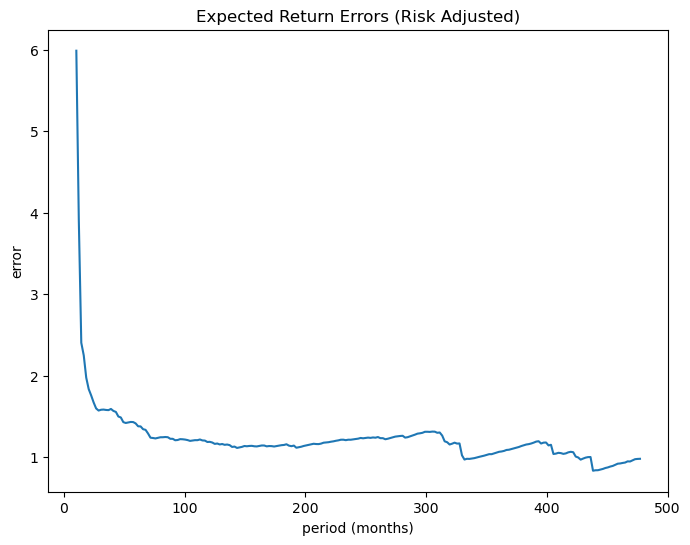

- Min Error: 0.8363402145701655
- Min Period: 438.1904761904762


In [10]:
# set method for estimatig return properties
method='Normal'
# reallocation time determined above
# used for delta between estimate and actual return
# 6 months in trading days
actDelta = 6*21
# adjust for samp freq (must be int)
actDelta = int(actDelta/sampFreq)

# set a max length based on total possible length (must be int)
pMax = int(0.80*len(returns_samp))
# requiering at least  data points for min
pMin = 5

# get the period range for later use
period = np.arange(pMin,pMax,1)
# for readability change to months
period = period*sampFreq/month2days

# get the errors
error = apa.calc_period_error(returns_samp,pMin,pMax,actDelta,method=method)

# Plot the data 
plt.figure(figsize=(8, 6))
plt.plot(period, error)
plt.xlabel('period (months)')
plt.ylabel('error')
plt.title('Expected Return Errors (Absolute)')
plt.show()

# find and print minimum
minInd = np.argmin(error)
print('- Min Error: '+str(error[minInd]))
print('- Min Period: '+str(period[minInd]))

# get the errors
error = apa.calc_period_error(returns_samp,pMin,pMax,actDelta,scale='Expected',method=method)

# Plot the data 
plt.figure(figsize=(8, 6))
plt.plot(period, error)
plt.xlabel('period (months)')
plt.ylabel('error')
plt.title('Expected Return Errors (Relative)')
plt.show()

# find and print minimum
minInd = np.argmin(error)
print('- Min Error: '+str(error[minInd]))
print('- Min Period: '+str(period[minInd]))


# get the errors
error = apa.calc_period_error(returns_samp,pMin,pMax,actDelta,scale='Disp',method=method)

# Plot the data 
plt.figure(figsize=(8, 6))
plt.plot(period, error)
plt.xlabel('period (months)')
plt.ylabel('error')
plt.title('Expected Return Errors (Risk Adjusted)')
plt.show()

# find and print minimum
minInd = np.argmin(error)
print('- Min Error: '+str(error[minInd]))
print('- Min Period: '+str(period[minInd]))


For the 'Normal' method, we found qualitativly similar features overall, and 
the minimum period length were quantitativly similar at 206 months.
However, some points of important quantiative difference 
(compared to the robust method) included
significantly higher errors at very short and very long period lengths,
as well as higher error even at the minimum.
Most notabley, a minimum relative error that was an order of magnitude higher.
In addition, a clear outlier result occured in calculation of relative error.
Taken to gether, this suggest the robust estimates to be a prefered choice.
This is consistant with the liturature where deviations from the normal distribution 
and the identifcation of outliers have been shown to consistantly skew results.

It could be argued that the risk adjusted error consistantly less than 1 
in the robust case could suggest a over bised estimate of dispersion.
That is the robust case consistantly estimates a dispersion that 
suggests there is more risk than is actually observed. 
However, this is of less concern than the points raised above.
That being said, the liturature does show other robust dispersion metrics 
or even MAD adjustment factors that have been shown to be statistically superior.

To this end, we are curently investigating a recently published 
approch to robust portfolio optimization overall, 
which includes an alternate method in estimating return dispersion.
Implimintation of this work is ongoing in our labs.
We belive the result shown above support the simplified approch of 
using a meadian and MAD (with a normal adjustment factor) 
to be adaquate for now.

Personal note,
given the finding of a high biased MAD we considered removing the 
normal adjustment in all calculations.  
It did, as expected, slightly increase the risk adjusted error closer to 1 (~0.7).
However, overall the results are all comparable for period determination.
The biggest effect was in identifying deviation events.
Given the method is to be used consistantly for other assets, 
and that a proprtional scaling factor should not impact optimization, 
we have chosen to continue with the normal adjustment.

## Historical Returns
A simple analysis was done regarding the average portfolio return 
depending on portfolio hold time.
We suggest that the longer a portfolio is held, the high the return.
We looked at relative returns in one month increments from zero to over about 11 years.
Averages were taken over the full SPY time course used above (1993-2024).

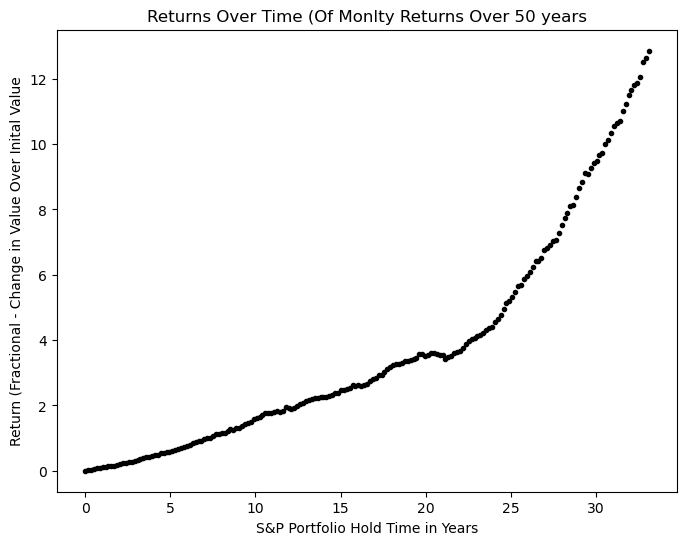

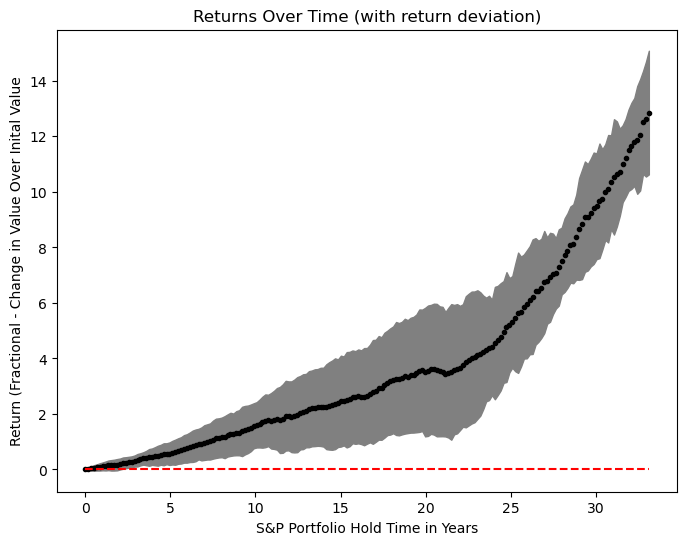

In [11]:

# calculate history of running returns 
returnHist, returnHistDisp, returnHistTime = apa.calc_running_returns(prices_samp,maxHoldFrac=0.666)

# convert hold time into years
returnHistTime = returnHistTime*sampFreq/month2days/12

plt.figure(figsize=(8, 6))
plt.plot(returnHistTime,returnHist,'.',color='black')
plt.xlabel('S&P Portfolio Hold Time in Years')
plt.ylabel('Return (Fractional - Change in Value Over Inital Value')
plt.title('Returns Over Time (Of Monlty Returns Over 50 years')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(returnHistTime,returnHist,'.',color='black')
plt.plot(returnHistTime,returnHist*0,'--',color='red')
plt.fill_between(returnHistTime,returnHist+returnHistDisp,returnHist-returnHistDisp,color='gray')
plt.xlabel('S&P Portfolio Hold Time in Years')
plt.ylabel('Return (Fractional - Change in Value Over Inital Value')
plt.title('Returns Over Time (with return deviation)')
plt.show()


There was a linear dependance with a slope of 13.3% from hold times of 0 to 6 years; 
however, the median returns demonstrated an unexpected drop for hold times between 6-8 years.
Following this drop, the median returns were again linear from 8 to 11 year hold times;
although now with an increased slope of 16.5% per year.
Without the drop the median return of SPY would have been close to the S&P, 
which was about 17% per year regardless of how long the S&P portfolio was held.

The results were consistant (as intended) with those found in project 202409.
See that project for further discussion.

The biggest difference here was that we chose to represent return deviation,
or noise in the calculation, 
using MAD to be consistant with other dispersion methods used throughout.
Project 202409 used the 95th and 5th values for the confidence interval.
The latter does provide some subtel but interesting insight
as it shows the asymetry in the deviation.
However, for simplicity in consistant use, we belive symetric measure is sufficent. 

## VI. Summary

Looking back to our original goals, 
we made the following important conclusions:
* sample freq - 38 days;
* optimal sample period - 19.5 years;
* acceptable sample period - 8.5 to 19.5 years; and
* typical returns of 16.5% if held for longer than 8 years (similar to the S&P500).

Furthermore, event deviation analysis indicated that it is very likley
for long-term investors to experiance abnormal deviations 
in price trends lasting greater than 4 months before recovery.
Based on this analysis we suggest mid- and long-term
investors wait between 8 and 18 months before making drastic 
SPY buy/sell decisions based only on this trend.
We do emphasize that this is pertiant to buy-and-hold 
investment styles using the (so far consistant) 
expectation that the price will recover given enough time.
There are certainly main market factors to consider when making decisions.
However, if you plan to hold the SPY for 5+ years, 
an 8 month sudden downtrend in price should not, in-and-of itself, 
force you to drop your position for a loss.
We do warn that this is based on historical trends to-date and
does not guarantee future results as fundemental market shifts can occur. 
And the data would encurage even buy-hold investors to consider
other market factors for unexpected trends over 18 months. 

Finally, 
by comparing this project with 202409, 
we are satisfied that the code re-factoring was completed without error.
Nearly all functionality has been migrated to modules under 
the analytics/functions sub-directories.

